In [1]:
import seaborn as sea
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

from pandas.api.types import is_numeric_dtype

Načítanie datasetu do dataframu

In [2]:
fifa_20_players = pd.read_csv("players_20.csv")

# Základné údaje o datasete

In [3]:
fifa_20_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


Základný dataset má:
- 18278 záznamov
- 104 atribútov

In [4]:
for col in fifa_20_players.columns:
    print(col)

sofifa_id
player_url
short_name
long_name
age
dob
height_cm
weight_kg
nationality
club
overall
potential
value_eur
wage_eur
player_positions
preferred_foot
international_reputation
weak_foot
skill_moves
work_rate
body_type
real_face
release_clause_eur
player_tags
team_position
team_jersey_number
loaned_from
joined
contract_valid_until
nation_position
nation_jersey_number
pace
shooting
passing
dribbling
defending
physic
gk_diving
gk_handling
gk_kicking
gk_reflexes
gk_speed
gk_positioning
player_traits
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties
mentality_composure
defe

In [5]:
fifa_20_players[fifa_20_players['sofifa_id'].duplicated()]

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb


# Odstránenie nepotrebných stĺpcov

In [6]:
fifa_20_players = fifa_20_players.drop(columns=['player_url', 'dob','body_type','nation_position','nation_jersey_number','team_position'])

In [7]:
fifa_20_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 98 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   sofifa_id                   18278 non-null  int64  
 1   short_name                  18278 non-null  object 
 2   long_name                   18278 non-null  object 
 3   age                         18278 non-null  int64  
 4   height_cm                   18278 non-null  int64  
 5   weight_kg                   18278 non-null  int64  
 6   nationality                 18278 non-null  object 
 7   club                        18278 non-null  object 
 8   overall                     18278 non-null  int64  
 9   potential                   18278 non-null  int64  
 10  value_eur                   18278 non-null  int64  
 11  wage_eur                    18278 non-null  int64  
 12  player_positions            18278 non-null  object 
 13  preferred_foot              182

# Odstránenie a nahradenie NaN hodnôt pre jednotlivé atribúty
Zistile sme, že niektorí hráči majú prázdne niektoré atribúty. Môže to byť spôsobené postom, na ktorom hrajú, alebo nehrajú v národnom tíme a pod.

In [8]:
for (columnName, columnData) in fifa_20_players.iteritems():
   print(columnName + " " + str(columnData.isnull().sum().sum()))

sofifa_id 0
short_name 0
long_name 0
age 0
height_cm 0
weight_kg 0
nationality 0
club 0
overall 0
potential 0
value_eur 0
wage_eur 0
player_positions 0
preferred_foot 0
international_reputation 0
weak_foot 0
skill_moves 0
work_rate 0
real_face 0
release_clause_eur 1298
player_tags 16779
team_jersey_number 240
loaned_from 17230
joined 1288
contract_valid_until 240
pace 2036
shooting 2036
passing 2036
dribbling 2036
defending 2036
physic 2036
gk_diving 16242
gk_handling 16242
gk_kicking 16242
gk_reflexes 16242
gk_speed 16242
gk_positioning 16242
player_traits 10712
attacking_crossing 0
attacking_finishing 0
attacking_heading_accuracy 0
attacking_short_passing 0
attacking_volleys 0
skill_dribbling 0
skill_curve 0
skill_fk_accuracy 0
skill_long_passing 0
skill_ball_control 0
movement_acceleration 0
movement_sprint_speed 0
movement_agility 0
movement_reactions 0
movement_balance 0
power_shot_power 0
power_jumping 0
power_stamina 0
power_strength 0
power_long_shots 0
mentality_aggression 0
m

Všetky atribúty začínajúce s "gk", ktoré majú len brankári, sme nahradili hodnotou 0.0. To rovnako platí pre atribúty Hráčom, ktorí nemajú výstupnú klauzulu, bola priradená taktiež hodnota 0.0. Veľa hráčov taktiež nemá žiaden tag. Títo hráči dostali tag #None. Atribúty player_traits a loaned_from dostali na prázdnych miestach 'None'. V atribúte joined sa očakáva dátum, takže každé prázdne miesto dostalo jeden konkrétny dátum. Hrači s prázdnym atribútom team_position boli odstránení.

In [9]:
fifa_20_players['gk_diving'] = fifa_20_players['gk_diving'].replace(np.nan, 0.0)
fifa_20_players['gk_handling'] = fifa_20_players['gk_handling'].replace(np.nan, 0.0)
fifa_20_players['gk_kicking'] = fifa_20_players['gk_kicking'].replace(np.nan, 0.0)
fifa_20_players['gk_reflexes'] = fifa_20_players['gk_reflexes'].replace(np.nan, 0.0)
fifa_20_players['gk_speed'] = fifa_20_players['gk_speed'].replace(np.nan, 0.0)
fifa_20_players['gk_positioning'] = fifa_20_players['gk_positioning'].replace(np.nan, 0.0)
fifa_20_players['pace'] = fifa_20_players['pace'].replace(np.nan, 0.0)
fifa_20_players['shooting'] = fifa_20_players['shooting'].replace(np.nan, 0.0)
fifa_20_players['passing'] = fifa_20_players['passing'].replace(np.nan, 0.0)
fifa_20_players['dribbling'] = fifa_20_players['dribbling'].replace(np.nan, 0.0)
fifa_20_players['defending'] = fifa_20_players['defending'].replace(np.nan, 0.0)
fifa_20_players['physic'] = fifa_20_players['physic'].replace(np.nan, 0.0)
fifa_20_players['release_clause_eur'] = fifa_20_players['release_clause_eur'].replace(np.nan, 0.0)
fifa_20_players['player_tags'] = fifa_20_players['player_tags'].replace(np.nan, "#None")
fifa_20_players['player_traits'] = fifa_20_players['player_traits'].replace(np.nan, 'None')
fifa_20_players['loaned_from'] = fifa_20_players['loaned_from'].replace(np.nan, 'None')
fifa_20_players['joined'] = fifa_20_players['joined'].replace(np.nan, '2019-08-31')
for (columnName, columnData) in fifa_20_players.iteritems():
   print(columnName + " " + str(columnData.isnull().sum().sum()))

sofifa_id 0
short_name 0
long_name 0
age 0
height_cm 0
weight_kg 0
nationality 0
club 0
overall 0
potential 0
value_eur 0
wage_eur 0
player_positions 0
preferred_foot 0
international_reputation 0
weak_foot 0
skill_moves 0
work_rate 0
real_face 0
release_clause_eur 0
player_tags 0
team_jersey_number 240
loaned_from 0
joined 0
contract_valid_until 240
pace 0
shooting 0
passing 0
dribbling 0
defending 0
physic 0
gk_diving 0
gk_handling 0
gk_kicking 0
gk_reflexes 0
gk_speed 0
gk_positioning 0
player_traits 0
attacking_crossing 0
attacking_finishing 0
attacking_heading_accuracy 0
attacking_short_passing 0
attacking_volleys 0
skill_dribbling 0
skill_curve 0
skill_fk_accuracy 0
skill_long_passing 0
skill_ball_control 0
movement_acceleration 0
movement_sprint_speed 0
movement_agility 0
movement_reactions 0
movement_balance 0
power_shot_power 0
power_jumping 0
power_stamina 0
power_strength 0
power_long_shots 0
mentality_aggression 0
mentality_interceptions 0
mentality_positioning 0
mentality_v

# Opis atribútov

sofifa_id - unikátne FIFA ID

short_name - meno hráča (krátka verzia)

long_name - meno hráča (dlhšia verzia)

age - numerický atribút vek hráča

height_cm - numerický atribút výška hráča v cm

weight_kg - numerický atribút váha hráča v kg

nationality - krajina pôvodu

club - aktuálne hrajúci za klub s názvom

overall - numerický atribút momentálny celkový rating hráča

potential - numberický atribút najvyššie možný dosiahnuteľná rating hráča

value_eur - numerický atribút hodnota hráča v hre

wage_eur - numerický atribút plat hráča v hre

player_positions - pozície na ktorých hráč hráva

preferred_foot - preferovaná noha ľavá/pravá

international_reputation - kategorický atribút od 1-5, kde 5 je najviac, a môže ovplyvniť celkový rating

weak_foot - kategorický atribút 1-5, čím vyššie číslo tým viac môže ovplyvniť streľbu a ovládanie lopty. 

skill_moves - kategorický atribút 1-5

work_rate - kategorický atribút kombinácia high,medium,low

real_face - áno/nie buď má svoju tvár v hre alebo nie

release_clause_eur - numerický atribút výstupná klauzula v eurách, nemajú všetci 

player_tags - tagy, ktorými možno označiť hráča

team_position - pozícia v tíme 

team_jersey_number - čislo, ktoré hráč nosí na drese

loaned_from - hosťovaný z klubu

joined - dátum príchodu do klubu

contract_valid_until - dátum expirácie kontraktu

numerické atribúty, kde najvyššia hodnota môže byť 99 a najmenšia 0:
pace,
shooting,
passing,
dribbling,
defending,
physic,
gk_diving,
gk_handling,
gk_kicking,
gk_reflexes,
gk_speed,
gk_positioning,
player_traits,
attacking_crossing,
attacking_finishing,
attacking_heading_accuracy,
attacking_short_passing,
attacking_volleys,
skill_dribbling,
skill_curve,
skill_fk_accuracy,
skill_long_passing,
skill_ball_control,
movement_acceleration,
movement_sprint_speed,
movement_agility,
movement_reactions,
movement_balance,
power_shot_power,
power_jumping,
power_stamina,
power_strength,
power_long_shots,
mentality_aggression,
mentality_interceptions,
mentality_positioning,
mentality_vision,
mentality_penalties,
mentality_composure,
defending_marking,
defending_standing_tackle,
defending_sliding_tackle,
goalkeeping_diving,
goalkeeping_handling,
goalkeeping_kicking,
goalkeeping_positioning,
goalkeeping_reflexes

Toto zatiaľ neviem čo je:
ls,
st,
rs,
lw,
lf,
cf,
rf,
rw,
lam,
cam,
ram,
lm,
lcm,
cm,
rcm,
rm,
lwb,
ldm,
cdm,
rdm,
rwb,
lb,
lcb,
cb,
rcb,
rb,

# Clustering - Third Hypothesis

Based on 2 selected attributes can we predict that a player belongs to one of these four categories (goalkeeper, defender, midfielder or striker).

In [233]:
len(fifa_20_players['nationality'].unique())

162

In [234]:
item_counts = fifa_20_players['nationality'].value_counts()
print(item_counts.head(20))

England                1667
Germany                1216
Spain                  1035
France                  984
Argentina               886
Brazil                  824
Italy                   732
Colombia                591
Japan                   453
Netherlands             416
China PR                373
Chile                   370
Sweden                  358
Norway                  350
Republic of Ireland     348
United States           347
Denmark                 345
Portugal                344
Mexico                  340
Poland                  324
Name: nationality, dtype: int64


In [235]:
from sklearn.cluster import KMeans
fifa_20_players.describe().columns

Index(['sofifa_id', 'age', 'height_cm', 'weight_kg', 'overall', 'potential',
       'value_eur', 'wage_eur', 'international_reputation', 'weak_foot',
       'skill_moves', 'release_clause_eur', 'team_jersey_number',
       'contract_valid_until', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'gk_speed', 'gk_positioning', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mental

In [236]:
new_df = fifa_20_players[['overall','attacking_finishing','defending_marking','player_positions','nationality']]
new_df = new_df[new_df.overall >= 80]
new_df.nationality.unique()

array(['Argentina', 'Portugal', 'Brazil', 'Slovenia', 'Belgium',
       'Germany', 'Netherlands', 'Croatia', 'Egypt', 'France', 'Senegal',
       'England', 'Spain', 'Italy', 'Uruguay', 'Poland', 'Denmark',
       'Gabon', 'Korea Republic', 'Costa Rica', 'Slovakia',
       'Bosnia Herzegovina', 'Serbia', 'Scotland', 'Hungary',
       'Switzerland', 'Greece', 'Austria', 'Morocco', 'Sweden', 'Wales',
       'Colombia', 'Czech Republic', 'Chile', 'Algeria', 'Ivory Coast',
       'Togo', 'Norway', 'Mexico', 'Iceland', 'Finland', 'Jamaica',
       'Albania', 'Guinea', 'Cameroon', 'Ghana', 'Montenegro', 'Ukraine',
       'Russia', 'DR Congo', 'Central African Rep.', 'Venezuela',
       'Nigeria', 'Armenia', 'Israel', 'Ecuador', 'Paraguay', 'Australia',
       'Turkey', 'Romania', 'Japan', 'Mali'], dtype=object)

In [237]:
len(new_df.index)

568

In [238]:
selected_columns = ['attacking_finishing','defending_marking']
cluster_players = new_df.loc[:, selected_columns]
cluster_players

,attacking_finishing,defending_marking
0,95,33
1,94,28
2,87,27
3,11,27
4,84,34
...,...,...
563,58,80
564,51,70
565,8,12
566,58,80


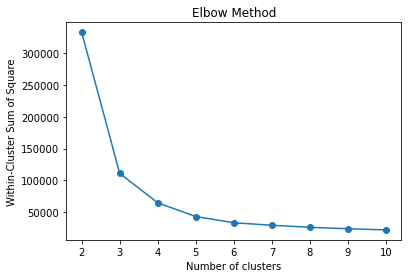

In [239]:
wcss = [] 

for number_of_clusters in range(2,11):
    kmeans = KMeans(n_clusters=number_of_clusters, init='k-means++', random_state=0)
    kmeans.fit(cluster_players)
    wcss.append(kmeans.inertia_)

plt.plot(range(2,11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Square')
plt.show()

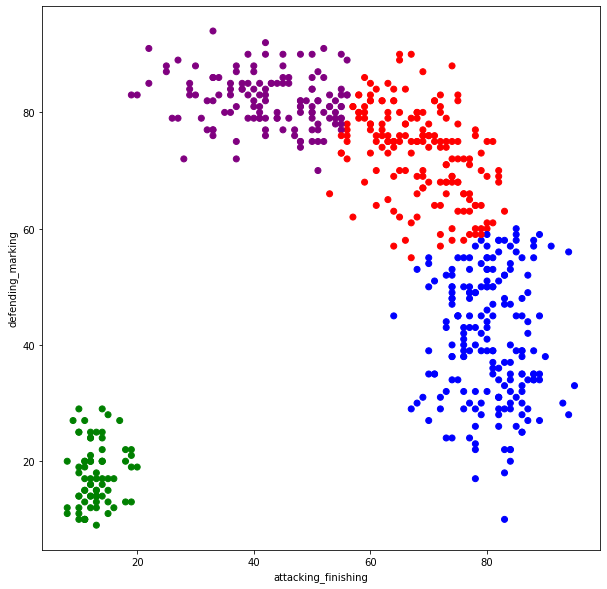

In [240]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
kmeans.fit(cluster_players)
y_pred = kmeans.predict(cluster_players)
color_list=[]
for number in y_pred:
    if number == 0:
        color_list.append('green')
    elif number == 1:
        color_list.append('red')
    elif number == 2:
        color_list.append('blue')
    else:
        color_list.append('purple')
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.scatter(cluster_players['attacking_finishing'],cluster_players['defending_marking'],c=color_list)
plt.xlabel("attacking_finishing")
plt.ylabel("defending_marking")
plt.show()


In [241]:
kmeans

KMeans(n_clusters=4, random_state=0)

In [242]:
new_df['player_positions'].unique()

array(['RW, CF, ST', 'ST, LW', 'LW, CAM', 'GK', 'LW, CF', 'CAM, CM', 'CB',
       'CM', 'RW, ST', 'ST, RW', 'ST', 'CDM, CM', 'CF, ST, LW', 'CAM, RW',
       'CM, CDM', 'RW, LW', 'CAM, LM, ST', 'ST, LM', 'LW, LM', 'CB, LB',
       'RW, CAM, CM', 'CDM', 'CF, LM', 'CF, ST', 'LB', 'CM, CAM, CDM',
       'CF, LW, ST', 'LW', 'CB, CDM', 'RB, CM, CDM', 'CAM, CM, LW',
       'CF, ST, CAM', 'LW, CM', 'CAM, RM, RW', 'CM, CAM', 'CM, LM, RM',
       'LB, CB', 'RB', 'CAM, CF, ST', 'RW, LW, ST', 'LB, LM',
       'RM, LM, CM', 'CAM, CM, RM', 'RM, LM', 'CAM, RM', 'CF, LW, CAM',
       'CAM, LM, RM', 'LM, RM, LW', 'RM, LM, LW', 'CAM', 'CAM, CM, CF',
       'LM', 'CDM, CB', 'RB, CB', 'RM, RW', 'LM, RW, LW', 'RM, CM',
       'CAM, LW, ST', 'RW, RM', 'CM, CDM, CAM', 'CM, CAM, CF',
       'LW, ST, LM', 'LM, ST', 'RM, RW, ST', 'LM, CAM, RM', 'LW, RW',
       'CF, LM, LW', 'RM, CAM', 'CF, RM, LM', 'RW, LW, CAM',
       'CDM, CM, CAM', 'CDM, CB, LB', 'ST, CAM, LW', 'ST, CF', 'RW, CAM',
       'LW, LM, RW', 'RW

In [243]:
new_df.insert(1,"cluster",y_pred)
new_df

,overall,cluster,attacking_finishing,defending_marking,player_positions,nationality
0,94,2,95,33,"RW, CF, ST",Argentina
1,93,2,94,28,"ST, LW",Portugal
2,92,2,87,27,"LW, CAM",Brazil
3,91,0,11,27,GK,Slovenia
4,91,2,84,34,"LW, CF",Belgium
...,...,...,...,...,...,...
563,80,1,58,80,"CDM, CM",Brazil
564,80,3,51,70,"LB, LM",Brazil
565,80,0,8,12,GK,Uruguay
566,80,1,58,80,"CDM, CM",Uruguay


In [244]:
cluster0 = -1
cluster1 = -1
cluster2 = -1
cluster3 = -1
for index, row in new_df.iterrows():
    if row['attacking_finishing'] > 90:
        cluster3 = row['cluster']
    elif row['attacking_finishing'] > 30 and row['attacking_finishing'] < 45:
        cluster1 = row['cluster']
    elif row['defending_marking'] < 30 and row['attacking_finishing'] < 30:
        cluster0 = row['cluster']
    elif row['defending_marking'] >= 63 and row['defending_marking'] <= 66:
        cluster2 = row['cluster']
    if cluster0 != -1 and cluster1 != -1 and cluster3 != -1 and cluster2 != -1:
        break

In [245]:
predicted_pos = []


for index, row in new_df.iterrows():
    if row['cluster'] == 0: 
        if cluster0 == 0:
            predicted_pos.append('GK')   
        elif cluster1 == 0:
            predicted_pos.append('DEF')
        elif cluster2 == 0:
            predicted_pos.append('MID')
        elif cluster3 == 0:
            predicted_pos.append('ATT')   
    elif row['cluster'] == 1:
        if cluster0 == 1:
            predicted_pos.append('GK')   
        elif cluster1 == 1:
            predicted_pos.append('DEF')
        elif cluster2 == 1:
            predicted_pos.append('MID')
        elif cluster3 == 1:
            predicted_pos.append('ATT')     
    elif row['cluster'] == 2:
        if cluster0 == 2:
            predicted_pos.append('GK')   
        elif cluster1 == 2:
            predicted_pos.append('DEF')
        elif cluster2 == 2:
            predicted_pos.append('MID')
        elif cluster3 == 2:
            predicted_pos.append('ATT')   
    else:
        if cluster0 == 3:
            predicted_pos.append('GK')   
        elif cluster1 == 3:
            predicted_pos.append('DEF')
        elif cluster2 == 3:
            predicted_pos.append('MID')
        elif cluster3 == 3:
            predicted_pos.append('ATT')   

new_df.insert(2,'predicted_pos',predicted_pos)
new_df

,overall,cluster,predicted_pos,attacking_finishing,defending_marking,player_positions,nationality
0,94,2,ATT,95,33,"RW, CF, ST",Argentina
1,93,2,ATT,94,28,"ST, LW",Portugal
2,92,2,ATT,87,27,"LW, CAM",Brazil
3,91,0,GK,11,27,GK,Slovenia
4,91,2,ATT,84,34,"LW, CF",Belgium
...,...,...,...,...,...,...,...
563,80,1,MID,58,80,"CDM, CM",Brazil
564,80,3,DEF,51,70,"LB, LM",Brazil
565,80,0,GK,8,12,GK,Uruguay
566,80,1,MID,58,80,"CDM, CM",Uruguay


In [246]:
results = pd.DataFrame(columns=['predicted_pos', 'ATT', 'MID','DEF','GK'])
row1 = {'predicted_pos': 'pred_ATT', 'ATT': 0, 'MID': 0, 'DEF' : 0, 'GK' : 0}
row2 = {'predicted_pos': 'pred_MID', 'ATT': 0, 'MID': 0, 'DEF' : 0, 'GK' : 0}
row3 = {'predicted_pos': 'pred_DEF', 'ATT': 0, 'MID': 0, 'DEF' : 0, 'GK' : 0}
row4 = {'predicted_pos': 'pred_GK', 'ATT': 0, 'MID': 0, 'DEF' : 0, 'GK' : 0}
results = results.append(row1, ignore_index = True).append(row2, ignore_index = True).append(row3, ignore_index = True).append(row4, ignore_index = True)
results

,predicted_pos,ATT,MID,DEF,GK
0,pred_ATT,0,0,0,0
1,pred_MID,0,0,0,0
2,pred_DEF,0,0,0,0
3,pred_GK,0,0,0,0


In [247]:
goalkeepers = ['GK']
defenders = ['CB','LB','RB','LWB','RWB']
midfielders = ['CDM','CM','RM','LM','CAM']
attackers = ['RW','LW','CF','ST']

for index,row in new_df.iterrows():
    pos = row['player_positions']
    pos = pos.partition(',')
    if row['predicted_pos'] == 'GK':
        if str(pos[0]) in goalkeepers:
            results.at[3,'GK'] += 1
        elif str(pos[0]) in defenders:
            results.at[3,'DEF'] += 1
        elif str(pos[0]) in midfielders:
            results.at[3,'MID'] += 1
        elif str(pos[0]) in attackers:
            results.at[3,'ATT'] += 1
    elif row['predicted_pos'] == 'DEF':
        if pos[0] in goalkeepers:
            results.at[2,'GK'] += 1
        elif str(pos[0]) in defenders:
            results.at[2,'DEF'] += 1
        elif str(pos[0]) in midfielders:
            results.at[2,'MID'] += 1
        elif str(pos[0]) in attackers:
            results.at[2,'ATT'] += 1
    elif row['predicted_pos'] == 'MID':
        if pos[0] in goalkeepers:
            results.at[1,'GK'] += 1
        elif str(pos[0]) in defenders:
            results.at[1,'DEF'] += 1
        elif str(pos[0]) in midfielders:
            results.at[1,'MID'] += 1
        elif str(pos[0]) in attackers:
            results.at[1,'ATT'] += 1
    elif row['predicted_pos'] == 'ATT':
        if pos[0] in goalkeepers:
            results.at[0,'GK'] += 1
        elif str(pos[0]) in defenders:
            results.at[0,'DEF'] += 1
        elif str(pos[0]) in midfielders:
            results.at[0,'MID'] += 1
        elif str(pos[0]) in attackers:
            results.at[0,'ATT'] += 1

results

,predicted_pos,ATT,MID,DEF,GK
0,pred_ATT,128,63,0,0
1,pred_MID,9,130,31,0
2,pred_DEF,0,19,112,0
3,pred_GK,0,0,0,76


In [248]:
(results.at[0,'ATT'] + results.at[1,'MID'] + results.at[2,'DEF'] + results.at[3,'GK']) / len(new_df.index)

0.7852112676056338